<a href="https://colab.research.google.com/github/nechebarrena/HOML/blob/main/HOML_cap_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CAPITULO 10 - HANDS ON MACHINE LEARNING**
## **Una introduccion a las redes neuronales con Keras**



En este capitulo vamos a introducir por primera vez la API Keras. En particular vamos a utilizar la implementacion para TensorFlow.

In [1]:
!python3 -m pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.7/dist-packages (2.5.0)


In [2]:
import tensorflow as tf
from tensorflow import keras
print('Version de Tensor Flow ==> ',tf.__version__)
print('Version de Keras ==> ',keras.__version__)

Version de Tensor Flow ==>  2.5.0
Version de Keras ==>  2.5.0


La version de keras no termina con un -tf tal como dice el libro. ¿Por que?

Vamos a tratar de resolver un problema de clasificacion de imagenes. En particular vamos a trabajar con un dataset incluido en Keras.

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full),(X_test,y_test) = fashion_mnist.load_data()

Forma del dataset =  (60000, 28, 28)
Maximo =  255  Minimo =  0
[0 1 2 3 4 5 6 7 8 9]


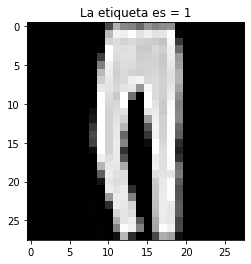

In [4]:
print('Forma del dataset = ',X_train_full.shape)
import matplotlib.pyplot as plt
import numpy as np
N = 285
plt.figure()
plt.imshow(X_train_full[N],cmap='gray', vmin=0, vmax=255)
plt.title("La etiqueta es = " +  str(int(y_train_full[N])))
print("Maximo = ",X_train_full.max()," Minimo = ",X_train_full.min())
print(np.unique(y_train_full))

En total tenemos $60$ mil imagenes en el conujunto de train. Las imagenes son matrices de $28 \times 28$ que representan prendas de vestir. Cada elemento de imagen tiene un valor que va entre $0$ y $255$. En total tenemos $10$ clases que debemos poder clasificar. Estas clases estan etiquetadas por un entero entre $[0,9]$.

A su vez ya podemos notar que tenemos una division entre Train y Test pero no tenemos un conjunto de validacion. Vamos a hacer este split y ademas vamos a normalizar los valores llevandolos del $[0,255] \rightarrow [0,1]$.

In [11]:
X_valid = X_train_full[:5000]/255
X_train = X_train_full[5000:]/255
y_valid = y_train_full[:5000]/255
y_train = y_train_full[5000:]/255
print(len(X_train))
print(len(X_valid))

55000
5000


Las clases el libro dicen que son las siguientes:

Text(0.5, 1.0, 'La etiqueta es = Pantalon')

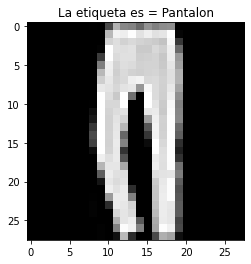

In [6]:
class_names = ["Remera","Pantalon","Pullover","Vestido","Saco","Sandalia","Camisa","Zapatilla","Bolso","Bota"]
plt.figure()
plt.imshow(X_train_full[N],cmap='gray', vmin=0, vmax=255)
plt.title("La etiqueta es = " +  class_names[y_train_full[N]])

Vamos a crear una red usando un diseño secuencial.

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=5,validation_data=(X_valid, y_valid))

Epoch 1/5
1719/1719 [==============================] - 6s 3ms/step - loss: 7.7361e-05 - accuracy: 0.1008 - val_loss: 8.9144e-05 - val_accuracy: 0.0914
Epoch 2/5
1719/1719 [==============================] - 6s 3ms/step - loss: 7.0672e-05 - accuracy: 0.1008 - val_loss: 8.2232e-05 - val_accuracy: 0.0914
Epoch 3/5
1719/1719 [==============================] - 6s 3ms/step - loss: 6.5016e-05 - accuracy: 0.1008 - val_loss: 7.6310e-05 - val_accuracy: 0.0914
Epoch 4/5
1719/1719 [==============================] - 6s 3ms/step - loss: 6.0173e-05 - accuracy: 0.1008 - val_loss: 7.1180e-05 - val_accuracy: 0.0914
Epoch 5/5
1719/1719 [==============================] - 5s 3ms/step - loss: 5.5983e-05 - accuracy: 0.1008 - val_loss: 6.6686e-05 - val_accuracy: 0.0914


{'loss': [7.736090628895909e-05, 7.067231490509585e-05, 6.501629104604945e-05, 6.0172817029524595e-05, 5.598304051090963e-05], 'accuracy': [0.10078182071447372, 0.10078182071447372, 0.10078182071447372, 0.10078182071447372, 0.10078182071447372], 'val_loss': [8.914420322980732e-05, 8.22323199827224e-05, 7.63099524192512e-05, 7.118003122741356e-05, 6.668555579381064e-05], 'val_accuracy': [0.09139999747276306, 0.09139999747276306, 0.09139999747276306, 0.09139999747276306, 0.09139999747276306]}


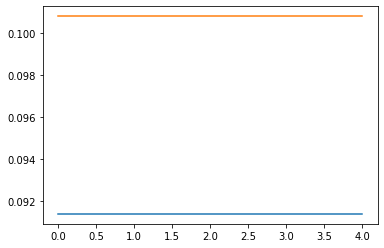

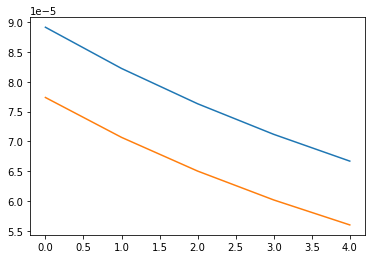

In [17]:
print(history.history)
plt.figure()
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])

plt.figure()
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])